In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('.\\Aprender2018-primaria-6.csv', delimiter=';', low_memory=False)

In [3]:
df.head()

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
0,4,2,1,1,1,10,2,2,1,2,...,"3,1642308","3,4787247",4,"624,30237","3,6379006",3,"497,9606",-1,-1,-1
1,2,1,1,1,1,4,1,1,-9,1,...,"3,1642308","3,4787247",3,"541,39209","3,6379006",3,"511,72632",1,1,1
2,2,1,1,1,1,6,1,1,-9,1,...,"3,1642308","3,4787247",3,"470,68723","3,6379006",3,"497,24191",2,2,2
3,5,2,1,1,1,6,1,1,2,1,...,"2,203661","2,208158",2,"434,76788","2,2108715",1,"364,33578",3,3,3
4,4,2,1,1,1,5,1,1,-9,1,...,"2,203661","2,208158",2,"418,23492","2,2108715",1,"366,13287",2,2,2


In [4]:
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

In [5]:
# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 103 columns


In [6]:
reduced_df.describe()

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ap39,ap40,ap41a,ap41b,ap41c,ap42,cod_provincia,sector,ambito,isocioa
count,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,...,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000,579510.000000
mean,2.312562,1.290161,1.026260,1.234807,1.342641,4.349091,0.499467,-0.210378,-2.960503,-0.702428,...,-0.908543,-0.817404,0.592150,0.615874,-0.152441,-1.015013,31.860199,1.299924,1.113046,1.509254
std,1.507055,1.555329,1.433073,2.013514,2.474701,2.656990,2.240390,3.527569,5.356727,3.873069,...,1.233281,1.520258,3.280874,3.849127,3.770834,0.890595,30.226557,0.458225,0.316649,1.266252
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,2.000000,1.000000,1.000000,-1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,-9.000000,1.000000,...,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,6.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,2.000000,2.000000,1.000000,-1.000000,14.000000,1.000000,1.000000,2.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,2.000000,1.000000,...,-1.000000,-1.000000,2.000000,3.000000,2.000000,-1.000000,58.000000,2.000000,1.000000,2.000000
max,5.000000,2.000000,9.000000,9.000000,9.000000,11.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,94.000000,2.000000,2.000000,3.000000


In [7]:
reduced_df['mdesemp'].replace(' ', np.nan, inplace=True)
reduced_df.dropna(subset=['mdesemp'], inplace=True)

reduced_df['ldesemp'].replace(' ', np.nan, inplace=True)
reduced_df.dropna(subset=['ldesemp'], inplace=True)

data = reduced_df[['ap2', 'ap7a', 'ap7b', 'ap7c', 'ap8', 'ap9', 'ap10', 'ap12', 'ap13a', 'ap13b', 'ap13c', 'ap14', 'ap15', 'ap16', 'ap17','ap20','ap21a','ap21b','ap22','ap23','ap24','ap37','ap38','ap39', 'cod_provincia', 'sector', 'ambito']]

In [8]:
data.loc[:,'matem_satisfactorio'] = pd.to_numeric(reduced_df['mdesemp']).apply(lambda x: 1 if x >=3 else 0)
data.loc[:,'lengua_satisfactorio'] = pd.to_numeric(reduced_df['ldesemp']).apply(lambda x: 1 if x >=3 else 0)

C:\Users\Alexsem\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Alexsem\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2)

train_target_lengua = train_data['lengua_satisfactorio']
train_target_matem = train_data['matem_satisfactorio']

test_target_lengua = test_data['lengua_satisfactorio']
test_target_matem = test_data['matem_satisfactorio']

del train_data['lengua_satisfactorio']
del train_data['matem_satisfactorio']
del test_data['lengua_satisfactorio']
del test_data['matem_satisfactorio']

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=6)

In [12]:
tree_clf.fit(train_data, train_target_matem)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

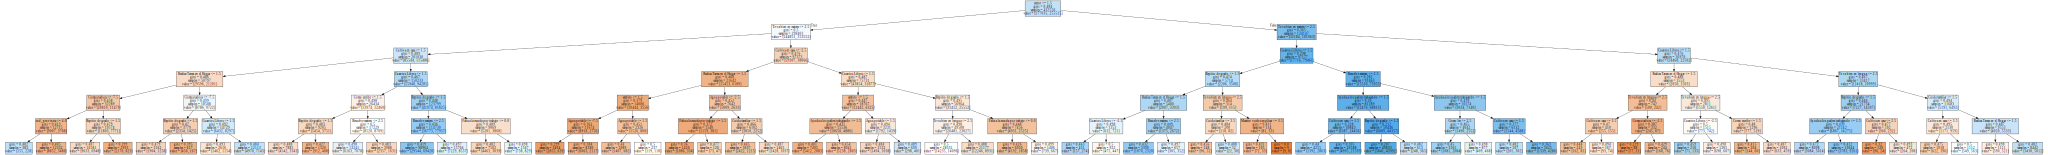

In [13]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = ['Sexo', 'Conexión a Internet', 'Agua potable', 
                 'Computadora', 'Cuantos Libros', 'Maximo nivel educ. madre', 
                 'Maximo nivel educ. padre', 'Lengua Indigena en casa', 'Cuida familiar', 
                 'Realiza Tareas en el Hogar', 'Cultiva en casa', 'Ayuda a los padres trabajando', 
                 'Trabaja fuera de casa', 'Fue al jardin', 'Repitio de grado',
                 'Te va bien en lengua','Como lee','Como escribe',
                 'Te va bien en matem','Resuelve matem.','Maestro vuele a explicar',
                 'Falta a la escuela por trabajo','Cuantos dias','Ira al secundario', 
                 'cod_provincia', 'sector', 'ambito']

export_graphviz(
        tree_clf,
        out_file="matem.dot",
        feature_names=feature_names,
        filled=True
    )

with open("matem.dot") as f:
    dot_graph = f.read()

# remove the display(...)

display(graphviz.Source(dot_graph))

In [14]:
pred_target_matem = tree_clf.predict(test_data)

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

species = np.array(test_target_matem)
predictions = np.array(pred_target_matem)
confusion_matrix(species, predictions)

array([[24796, 19457],
       [15889, 47996]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [25]:
ab_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_clf.fit(train_data, train_target_matem)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [26]:
pred_target_matem = ab_clf.predict(test_data)

species = np.array(test_target_matem)
predictions = np.array(pred_target_matem)
confusion_matrix(species, predictions)

array([[23380, 20873],
       [11917, 51968]], dtype=int64)

In [27]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rf_clf.fit(train_data, train_target_matem)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
pred_target_matem = rf_clf.predict(test_data)

species = np.array(test_target_matem)
predictions = np.array(pred_target_matem)
confusion_matrix(species, predictions)

array([[27843, 16410],
       [19844, 44041]], dtype=int64)

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(train_data, train_target_matem)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
pred_target_matem = nb_clf.predict(test_data)

species = np.array(test_target_matem)
predictions = np.array(pred_target_matem)
confusion_matrix(species, predictions)

array([[16956, 27297],
       [11756, 52129]], dtype=int64)